# Analisis de Datos Filtrados
El objetivo es repetir y ampliar el analisis ya hecho, pero ahora con la data tal cual será utilizada para el modelado.

## Preparacion

In [25]:
# Importo librerías
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.image as mpimg
import os

In [26]:
# Importo mis funciones personalizadas
import custom_functions as cf

In [27]:
directorio_filtered = './filtered_data'
ruta_posiciones_filtered = os.path.join(directorio_filtered, 'data_posiciones_filtered.csv')
data_posiciones_filtered = pd.read_csv(ruta_posiciones_filtered)

data_posiciones_filtered.sample(7)

id  match_id  player_id           x           y  velocity_x  \
167525  222997       345        318   91.531525   29.654747  530.588396   
6346     29034        50         55   82.849135   22.023669  159.893723   
2424     24925        44         49  160.378577 -175.909604 -161.209062   
160359  213141       324        297  382.549719  -22.898304    5.357758   
87116   128764       212        173  457.229937  211.811873   60.332010   
98573   144159       242          0  397.018746   97.130063  228.382611   
130403  179452       281        246 -314.590647   40.851924    8.140504   

        velocity_y        time  team  cant_de_duplicados  
167525  -13.112882   20.816667     2                   1  
6346      6.305395   17.666667     1                   1  
2424      2.524708   89.133333     1                   1  
160359   -1.486012  130.533333     2                   1  
87116    13.377555   86.016667     1                   1  
98573  -136.569965  175.966667     0                   1  
130403   71.002737  103.733333     2                   1

In [28]:
ruta_goles_filtered = os.path.join(directorio_filtered, 'data_goles_filtered.csv')
data_goles_filtered = pd.read_csv(ruta_goles_filtered)

data_goles_filtered.sample(7)

id  match_id  player_id    player_name equipo        tick
160  360       122        122       respect     Red   12.383333
217  424       146        140            Bv_   Blue   79.616667
262  531       201        176     🎄┇₸iziɑno௹   Blue    8.700000
302  575       218         40                  Blue   94.566667
285  554       209        117            Tuc    Red   25.100000
580  922       363        323           adam   Blue  172.516667
592  934       371        336  colo(noprime)    Red   40.600000

## Analisis de data filtrada

### Imagen de la cancha para plotear

In [29]:
background_image = mpimg.imread('stadium.PNG')

### Conteos de valores

In [30]:
# Analizo la cantidad de repeticiones de valores en las columnas seleccionadas en las tablas seleccionadas.
columns_goles = ['match_id', 'player_name', 'equipo']
columns_posiciones = ['match_id', 'player_id']

cf.print_value_counts(data_goles_filtered, 'data_goles', 5, columns_goles)
cf.print_value_counts(data_posiciones_filtered, 'data_posiciones', 5, columns_posiciones)

Value counts para data_goles - Columna: match_id
match_id
272    5
76     5
389    5
99     5
379    5
Name: count, dtype: int64


Value counts para data_goles - Columna: player_name
player_name
tnt              77
Tuc              22
marco!"          17
SAMIR-ESKIMAL    13
                 13
Name: count, dtype: int64


Value counts para data_goles - Columna: equipo
equipo
Red     380
Blue    369
Name: count, dtype: int64


Value counts para data_posiciones - Columna: match_id
match_id
262    2289
422    2009
398    1946
76     1911
282    1869
Name: count, dtype: int64


Value counts para data_posiciones - Columna: player_id
player_id
0      34617
2      17579
325     3628
373     3371
48      3248
Name: count, dtype: int64




### Agrupo datos para EDA

In [31]:
data_grouped_entities = data_posiciones_filtered.groupby(['match_id', 'time']).size().reset_index(name='entities')

print(data_grouped_entities.sample(7))

# Agrupo momentos con sus entidades
time_counts = data_grouped_entities['time'].value_counts().sort_index()
data_time_counts = time_counts.reset_index()
data_time_counts.columns = ['time', 'count']

# Agrupo momentos con sus entidades y filtro los momentos que tengan exactamente 7 entidades
data_grouped_entities_7ents = data_grouped_entities[data_grouped_entities['entities'] == 7]
time_counts_7ents = data_grouped_entities_7ents['time'].value_counts().sort_index()
data_time_counts_7ents = time_counts_7ents.reset_index()
data_time_counts_7ents.columns = ['time', 'count']

       match_id        time  entities
20616       307   97.266667         7
37           42   37.616667         7
32842       427  135.900000         7
19801       291   11.866667         7
31446       413   98.283333         7
25738       361  163.883333         7
33400       432  114.766667         7


### Cantidad de partidos por cantidad de goles y resultados

C:\Users\ASROCK\AppData\Local\Temp\ipykernel_4088\1556251887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=goal_counts, x='total_goals', palette='Greens')


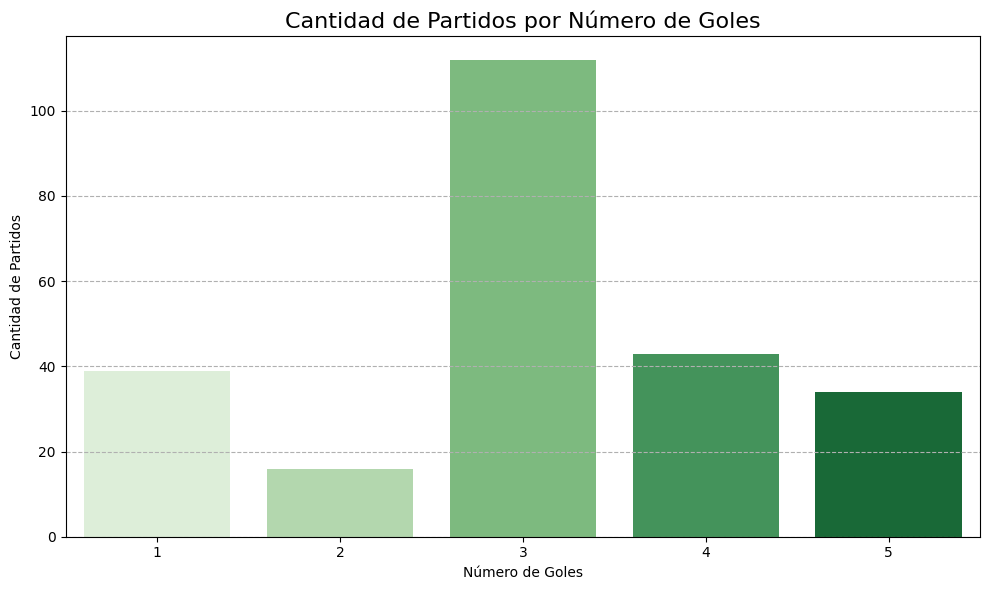

In [32]:
# Obtener la cantidad de goles por partido
goal_counts = data_goles_filtered.groupby('match_id').size().reset_index(name='total_goals')

# Crear barplot de la distribución de goles por partido
plt.figure(figsize=(10, 6))
sns.countplot(data=goal_counts, x='total_goals', palette='Greens')
plt.title('Cantidad de Partidos por Número de Goles', fontsize=16)
plt.xlabel('Número de Goles')
plt.ylabel('Cantidad de Partidos')
plt.xticks()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [33]:
# Filtrar partidos con el máximo time entre 179 y 180
matches_grouped = data_posiciones_filtered.groupby('match_id')['time'].max().reset_index()
matches_that_finished_by_time_limit = matches_grouped[(matches_grouped['time'] >= 179) & (matches_grouped['time'] <= 180)]

# Filtrar partidos con el máximo time menor a 179 y un ganador con 3 goles o más
matches_that_finished_by_red_or_blue_win = matches_grouped[matches_grouped['time'] < 179]
match_results = data_goles_filtered.groupby(['match_id', 'equipo']).size().unstack(fill_value=0).reset_index()
match_results.columns = ['match_id', 'Blue', 'Red']

# Filtrar para los partidos donde el ganador tiene 3 goles o más
match_results['Red'] = match_results['Red'].astype(int)
match_results['Blue'] = match_results['Blue'].astype(int)

match_results_filtered = match_results[(match_results['Red'] >= 3) | (match_results['Blue'] >= 3)]
matches_that_finished_by_red_or_blue_win = matches_that_finished_by_red_or_blue_win[matches_that_finished_by_red_or_blue_win['match_id'].isin(match_results_filtered['match_id'])]

# Filtrar partidos con el máximo time mayor a 180 y con un ganador
matches_that_finished_after_180 = matches_grouped[matches_grouped['time'] > 180]
matches_that_finished_after_180 = matches_that_finished_after_180[matches_that_finished_after_180['match_id'].isin(match_results['match_id'])]

# Concatenar todos los partidos válidos
valid_matches = pd.concat([
    matches_that_finished_by_time_limit,
    matches_that_finished_by_red_or_blue_win,
    matches_that_finished_after_180
])

# Combinar con los resultados de goles
valid_matches_with_results = match_results.merge(valid_matches, on='match_id')

# Añadir la columna de resultado como texto
valid_matches_with_results['Resultado'] = valid_matches_with_results.apply(
    lambda row: f"{int(row['Red'])}-{int(row['Blue'])}", axis=1
)

# Añadir la columna de "Modo de victoria" para indicar cómo terminó cada partido
valid_matches_with_results['Modo_Victoria'] = valid_matches_with_results['time'].apply(
    lambda x: 'Antes del 180' if x < 179 else ('En el 180' if 179 <= x <= 181 else 'Después del 180')
)

# Filtrar los partidos con resultados relevantes
valid_matches_with_results_filtered = valid_matches_with_results[
    (valid_matches_with_results['Red'] != valid_matches_with_results['Blue']) | 
    (valid_matches_with_results['Red'] >= 3) | 
    (valid_matches_with_results['Blue'] >= 3)
]

# Mostrar el DataFrame resultante
print(valid_matches_with_results_filtered)

     match_id  Blue  Red        time Resultado    Modo_Victoria
0          42     0    3   61.616667       3-0    Antes del 180
1          43     0    1  194.850000       1-0  Después del 180
2          44     0    1  179.133333       1-0        En el 180
3          45     3    0  150.483333       0-3    Antes del 180
4          46     3    0   49.183333       0-3    Antes del 180
..        ...   ...  ...         ...       ...              ...
219       436     0    1  179.633333       1-0        En el 180
220       437     1    2  179.066667       2-1        En el 180
221       438     0    3   87.200000       3-0    Antes del 180
222       440     3    2  193.816667       2-3  Después del 180
223       441     3    0   63.566667       0-3    Antes del 180

[224 rows x 6 columns]


In [34]:
valid_matches_with_results_filtered['Modo_Victoria'].value_counts()

Modo_Victoria
Antes del 180      135
En el 180           55
Después del 180     34
Name: count, dtype: int64

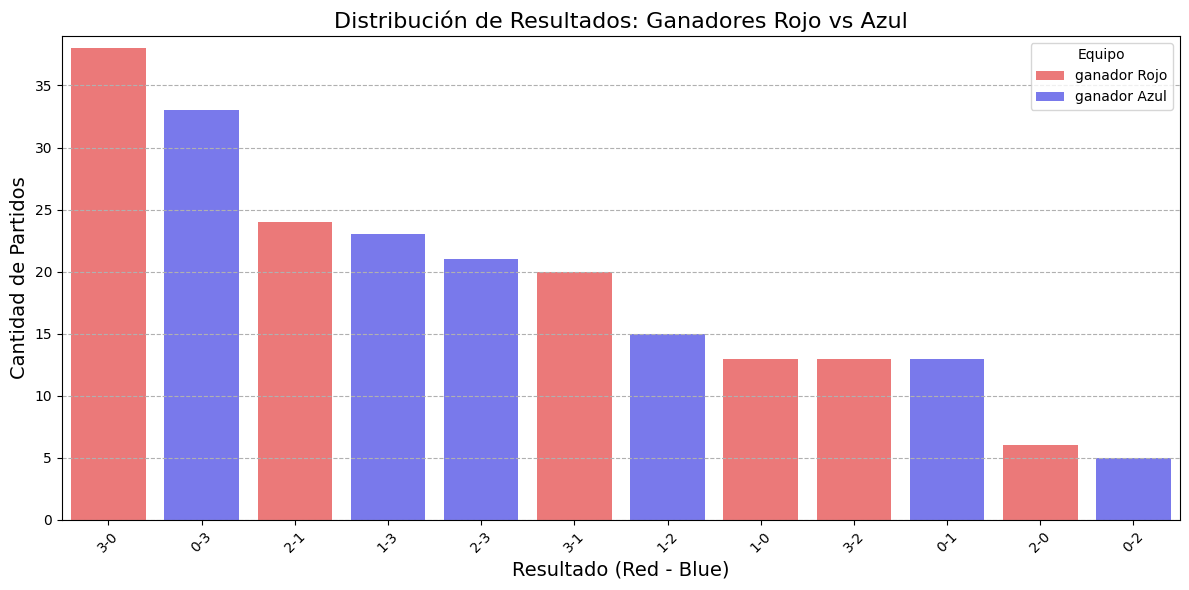

In [35]:
# Dividir los datos para los partidos ganados por el equipo rojo y azul
matches_red_wins  = valid_matches_with_results_filtered[valid_matches_with_results_filtered['Red'] > valid_matches_with_results_filtered['Blue']]
matches_blue_wins = valid_matches_with_results_filtered[valid_matches_with_results_filtered['Blue'] > valid_matches_with_results_filtered['Red']]

# Encontrar el máximo conteo de los resultados para ajustar los límites del gráfico
max_red_wins_count = matches_red_wins['Resultado'].value_counts().max()
max_blue_wins_count = matches_blue_wins['Resultado'].value_counts().max()
max_count = max(max_red_wins_count, max_blue_wins_count)

# Crear el gráfico en una sola figura
plt.figure(figsize=(12, 6))

# Barplot para el equipo rojo
sns.countplot(data=matches_red_wins, x='Resultado', order=valid_matches_with_results_filtered['Resultado'].value_counts().index, color='red', label='Rojo', alpha=0.6)

# Barplot para el equipo azul, superpuesto al gráfico rojo
sns.countplot(data=matches_blue_wins, x='Resultado', order=valid_matches_with_results_filtered['Resultado'].value_counts().index, color='blue', label='Azul', alpha=0.6)

# Ajustes de título, etiquetas y leyenda
plt.title('Distribución de Resultados: Ganadores Rojo vs Azul', fontsize=16)
plt.xlabel('Resultado (Red - Blue)', fontsize=14)
plt.ylabel('Cantidad de Partidos', fontsize=14)
plt.ylim(0, max_count + 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Mostrar leyenda
plt.legend(title='Equipo', labels=['ganador Rojo', 'ganador Azul'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Distribucion de los ticks en los momentos captados en los partidos

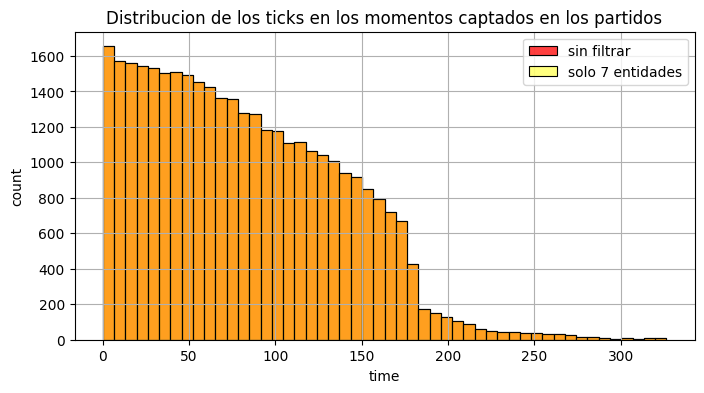

In [36]:
# Histograma de la distribucion de los ticks en los momentos captados en los partidos
plt.figure(figsize=(8, 4))

h1 = sns.histplot(data_time_counts, x='time', weights='count', color='red', kde=False, bins=50, label='sin filtrar')
h2 = sns.histplot(data_time_counts_7ents, x='time', weights='count', color='yellow', alpha=0.5, kde=False, bins=50, label='solo 7 entidades')

plt.title('Distribucion de los ticks en los momentos captados en los partidos')
plt.xlabel('time')
plt.ylabel('count')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.grid(True)

plt.show()

El histograma muestra la distribución de los ticks de los momentos de los partidos que fueron recoilados. En rojo grafico se muestran todos, en amarillo a los pertenecientes a momentos con 7 entidades exactamente en la cancha, y en naranja cuando ambas barras se solapan (es de esperar que no se vea amarillo, y solo naranja).

Notar que la duración estándar de un partido es de 300 ticks, pero puede terminar antes si un equipo mete 3 goles, o puede terminar despues si en el tick 300 el partido va empatado.

### Distribucion de goles a lo largo de los ticks

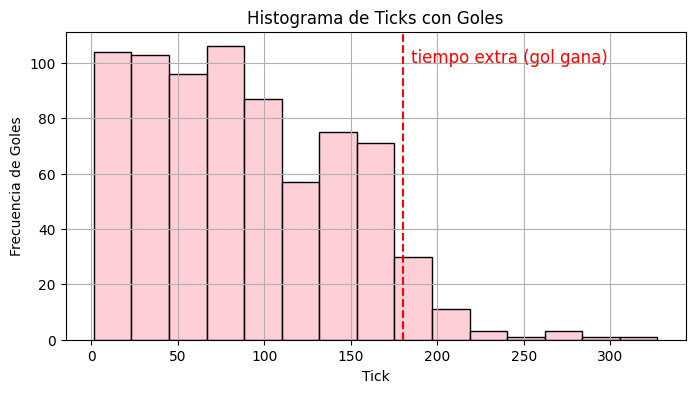

In [37]:
plt.figure(figsize=(8,4))

# Crear el histograma
sns.histplot(data=data_goles_filtered, x='tick', bins=15, kde=False, color='pink')

# Añadir una línea punteada en el valor 180 del eje x
plt.axvline(x=180, color='red', linestyle='--')

# Añadir un texto a la derecha de la línea
plt.text(185, plt.gca().get_ylim()[1] * 0.9, 'tiempo extra (gol gana)', color='red', fontsize=12)

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Ticks con Goles')
plt.xlabel('Tick')
plt.ylabel('Frecuencia de Goles')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Momentos de partidos

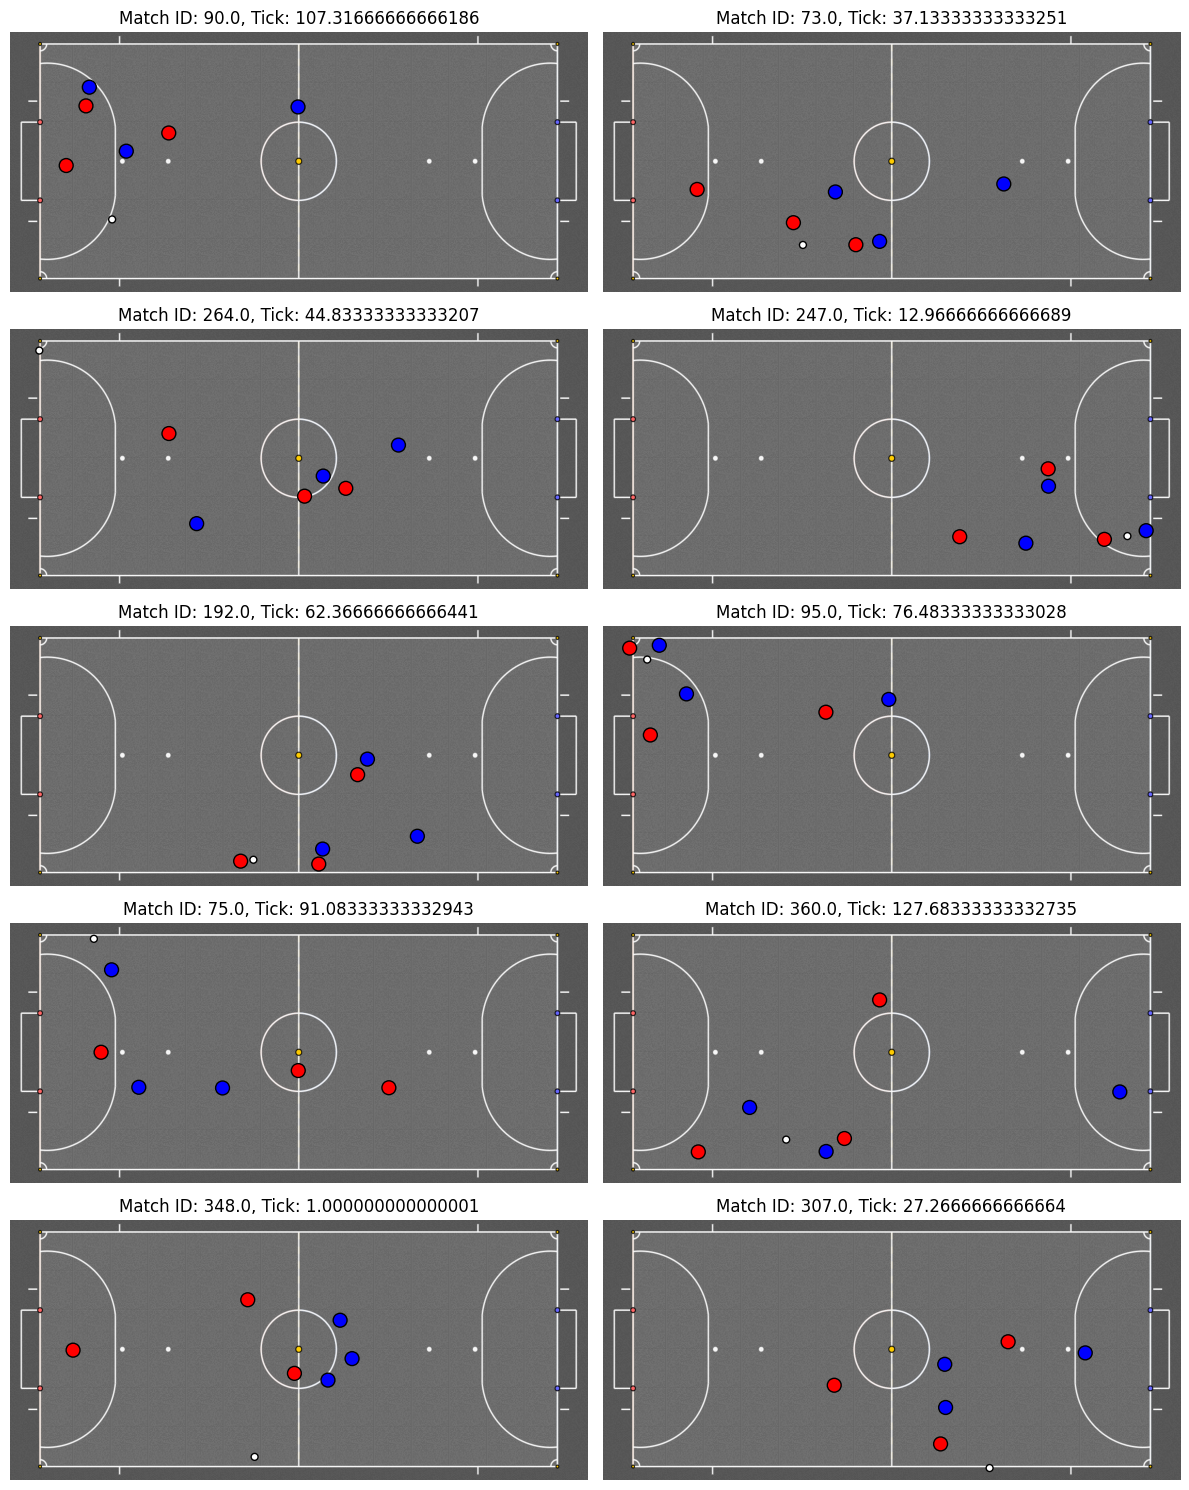

In [38]:
# Plots de momentos de partidos al azar

# Seleccionar aleatoriamente combinaciones de match_id y tick
unique_moments = data_posiciones_filtered[['match_id', 'time']].drop_duplicates()
random_moments = unique_moments.sample(n=10)

# Crear subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.ravel()  # Aplanar el array de ejes para facilitar el acceso

# Filtrar y graficar los datos para cada momento seleccionado
for i, (index, moment) in enumerate(random_moments.iterrows()):
    match_id = moment['match_id']
    tick = moment['time']
    
    # Filtrar datos para el momento actual
    moment_data = data_posiciones_filtered[(data_posiciones_filtered['match_id'] == match_id) & (data_posiciones_filtered['time'] == tick)]

    
    # Graficar los datos en el subplot correspondiente
    ax = axs[i]
    ax.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')
    
    # Asignar colores y tamaños según el equipo
    colors = moment_data['team'].astype(str).map({'0': 'white', '1': 'red', '2': 'blue'})
    sizes = moment_data['team'].astype(str).map({'0': 25, '1': 100, '2': 100})
    
    scatter = ax.scatter(moment_data['x'], moment_data['y'], c=colors, s=sizes, edgecolors='black')
    ax.set_title(f'Match ID: {match_id}, Tick: {tick}')
    ax.set_xlim([-605, 605])
    ax.set_ylim([-255, 255])
    ax.axis('off')  # Opcional: para ocultar los ejes

plt.tight_layout()
plt.show()

In [39]:
moment_data

id  match_id  player_id           x           y  velocity_x  \
143829  196028       307          2  244.880709   16.510626 -119.865884   
143830  196029       307        283  112.098712  -27.769636   -3.418755   
143831  196030       307        285 -119.430383  -68.885289  -62.315122   
143832  196031       307        286  113.881125 -112.571211  -71.533685   
143833  196032       307        287  103.334354 -184.158511  -14.882785   
143834  196033       307        288  406.508492   -5.341861  -14.794364   
143835  196034       307          0  206.079802 -231.519435   74.728335   

        velocity_y       time  team  cant_de_duplicados  
143829  -20.868302  27.266667     1                   1  
143830  -47.397065  27.266667     2                   1  
143831  -89.016138  27.266667     1                   1  
143832  -62.534482  27.266667     2                   1  
143833  -88.389816  27.266667     1                   1  
143834  -40.395440  27.266667     2                   1  
143835 -107.332316  27.266667     0                   1

### Etiquetando algunos datos


In [40]:
# Crear nuevas columnas en nuevo dataframe de etiquetado, inicializadas con 'none' para indicar si habrá gol en los próximos 'n' ticks

data_grouped_entities_7ents_labeled = data_grouped_entities_7ents
data_grouped_entities_7ents_labeled['gol_1_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_2_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_3_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_4_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_5_ticks'] = 'none'
data_grouped_entities_7ents_labeled['gol_6_ticks'] = 'none'

# Crear un diccionario para acceso rápido a los goles por match_id
goles_dict = data_goles_filtered.groupby('match_id').apply(lambda x: x[['tick', 'equipo']].to_dict('records')).to_dict()

In [41]:
# Iterar sobre las filas de data_grouped_entities_7ents
for index, row in data_grouped_entities_7ents.iterrows():
    match_id = row['match_id']
    time = row['time']
    
    if match_id in goles_dict:
        goles = goles_dict[match_id]
        
        # Filtrar goles futuros a partir del tiempo actual
        futuros_goles = [gol for gol in goles if gol['tick'] > time]
        
        for offset in range(1, 7):  # Revisar para ticks 1, 2, 3, 4, 5 y 6
            gol_cercano = next((gol['equipo'] for gol in futuros_goles if gol['tick'] <= time + offset), 'none')
            col_name = f'gol_{offset}_ticks'
            data_grouped_entities_7ents.at[index, col_name] = gol_cercano

In [42]:
# Verificar resultados solo para match_id elegido
match_id_test = 141 # En el match 141, el Red gana 3-0, y hay dos goles muy seguidos (ticks 46- 48)
data_grouped_entities_7ents_match_id_test = data_grouped_entities_7ents[data_grouped_entities_7ents['match_id'] == match_id_test]

# Configurar para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita que las columnas se corten

# Muestra una muestra aleatoria o todas las filas del match_id 54
data_grouped_entities_7ents_match_id_test

match_id  time  entities gol_1_ticks gol_2_ticks gol_3_ticks gol_4_ticks gol_5_ticks gol_6_ticks
9221       141   0.6         7        none        none        none        none        none        none
9222       141   1.6         7        none        none        none        none        none        none
9223       141   2.6         7        none        none        none        none        none        none
9224       141   3.6         7        none        none        none        none        none        none
9225       141   4.6         7        none        none        none        none        none        none
9226       141   5.6         7        none        none        none        none        none        none
9227       141   6.6         7        none        none        none        none        none        none
9228       141   7.6         7        none        none        none        none        none        none
9229       141   8.6         7        none        none        none        none        none        none
9230       141   9.6         7        none        none        none        none        none        none
9231       141  10.6         7        none        none        none        none        none        none
9232       141  11.6         7        none        none        none        none        none        none
9233       141  12.6         7        none        none        none        none        none        none
9234       141  13.6         7        none        none        none        none        none        none
9235       141  14.6         7        none        none        none        none        none        none
9236       141  15.6         7        none        none        none        none        none        none
9237       141  16.6         7        none        none        none        none        none        none
9238       141  17.6         7        none        none        none        none        none        none
9239       141  18.6         7        none        none        none        none        none        none
9240       141  19.6         7        none        none        none        none        none        none
9241       141  20.6         7        none        none        none        none        none        none
9242       141  21.6         7        none        none        none        none        none        none
9243       141  22.6         7        none        none        none        none        none        none
9244       141  23.6         7        none        none        none        none        none        none
9245       141  24.6         7        none        none        none        none        none        none
9246       141  25.6         7        none        none        none        none        none        none
9247       141  26.6         7        none        none        none        none        none        none
9248       141  27.6         7        none        none        none        none        none        none
9249       141  28.6         7        none        none        none        none        none        none
9250       141  29.6         7        none        none        none        none        none        none
9251       141  30.6         7        none        none        none        none        none        none
9252       141  31.6         7        none        none        none        none        none        none
9253       141  32.6         7        none        none        none        none        none        none
9254       141  33.6         7        none        none        none        none        none        none
9255       141  34.6         7        none        none        none        none        none        none
9256       141  35.6         7        none        none        none        none        none        none
9257       141  36.6         7        none        none        none        none        none        none
9258       141  37.6         7        none        none        none        none        none  

In [43]:
# Configurar para volver a los valores estandar de las filas y columnas
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')

### Posicionamiento en la cancha de todos los jugadores en un partido

match_id seleccionado: 315
Resultado del partido: Equipo Red 2 - 1 Equipo Blue


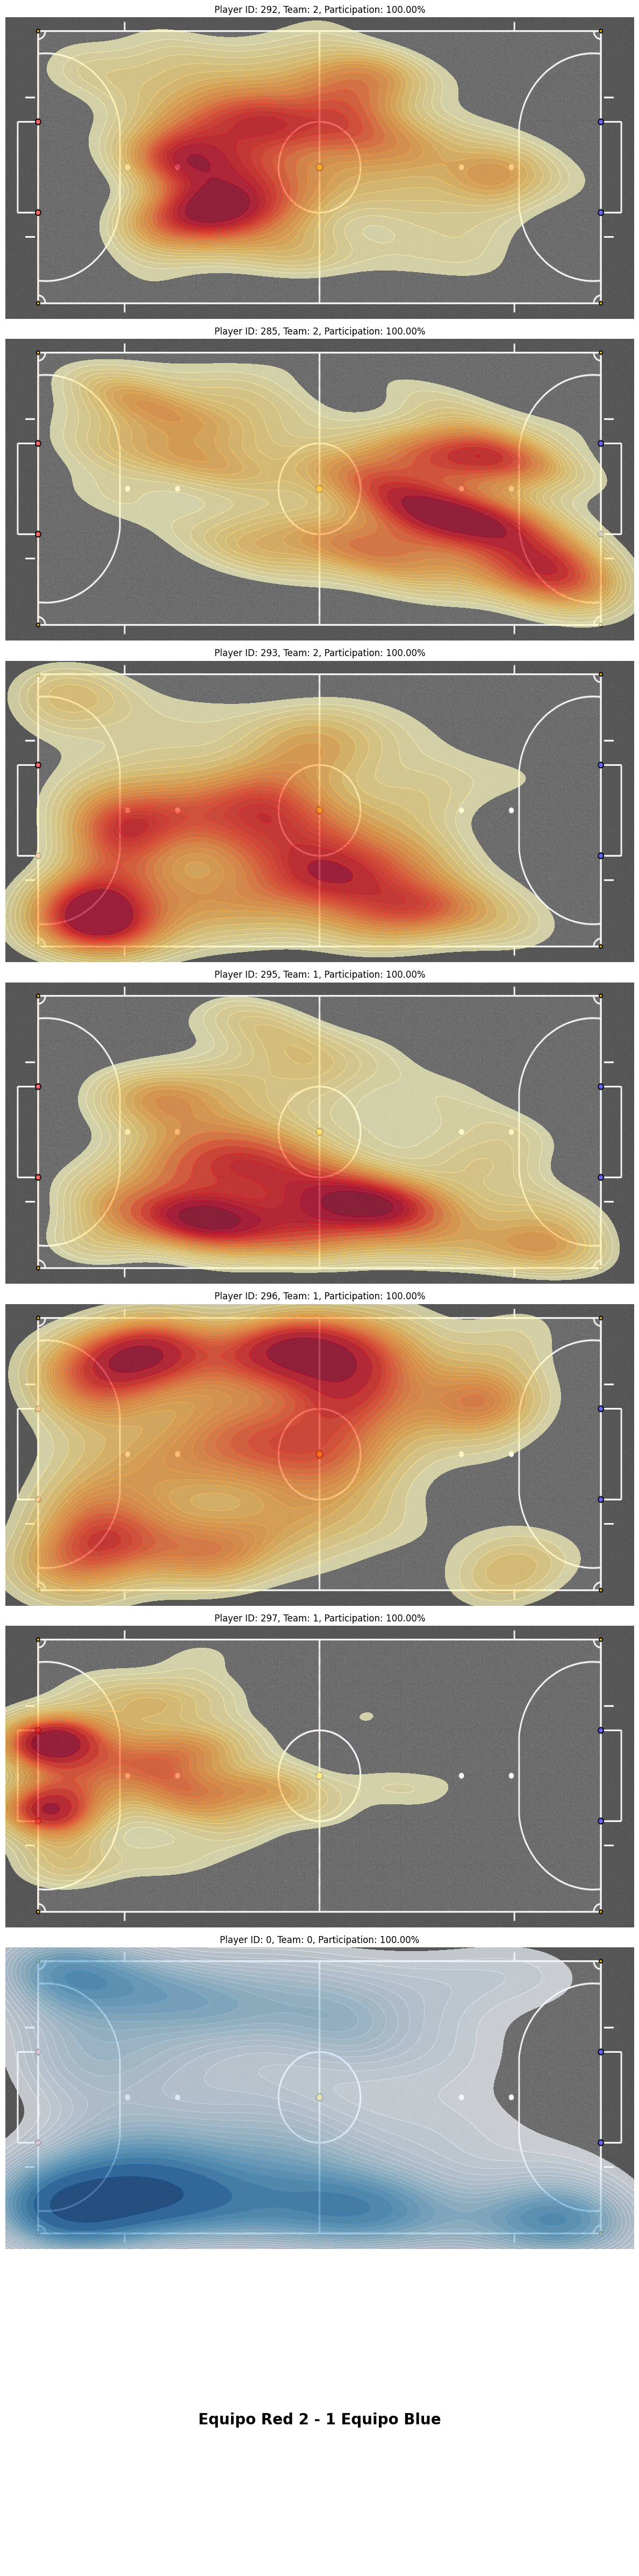

In [44]:
# Proporcionar el match_id deseado
match_id = 315  # Cambia esto al match_id deseado
print('match_id seleccionado:', match_id)

# Contar los goles de cada equipo en el partido
goles_red = data_goles_filtered[(data_goles_filtered['match_id'] == match_id) & (data_goles_filtered['equipo'] == 'Red')].shape[0]
goles_blue = data_goles_filtered[(data_goles_filtered['match_id'] == match_id) & (data_goles_filtered['equipo'] == 'Blue')].shape[0]
resultado_partido = f'Equipo Red {goles_red} - {goles_blue} Equipo Blue'
print('Resultado del partido:', resultado_partido)

# Filtrar todos los momentos de ese partido
match_data = data_posiciones_filtered[data_posiciones_filtered['match_id'] == match_id]

# Obtener las combinaciones únicas de jugador y equipo en el partido
unique_combinations = match_data[['player_id', 'team']].drop_duplicates()

# Crear subplots
fig, axs = plt.subplots(len(unique_combinations) + 1, 1, figsize=(12, (len(unique_combinations) + 1) * 6))
axs = axs.ravel()  # Aplanar el array de ejes para facilitar el acceso

# Cargar la imagen de fondo de la cancha de fútbol
background_image = mpimg.imread('C:/Users/ASROCK/Desktop/haxball_ai/maps/x3_bazinga.PNG')

# Calcular el número total de momentos en el partido
total_moments = match_data['time'].nunique()

# Iterar sobre cada combinación jugador-equipo y crear su mapa de calor
for i, (index, row) in enumerate(unique_combinations.iterrows()):
    player_id = row['player_id']
    team = row['team']
    
    # Filtrar datos para el jugador y equipo actual
    player_team_data = match_data[(match_data['player_id'] == player_id) & (match_data['team'] == team)]
    
    # Calcular el porcentaje de momentos en los que el jugador estuvo presente
    player_moments = player_team_data['time'].nunique()
    participation_percentage = (player_moments / total_moments) * 100
    
    # Graficar la imagen de fondo
    ax = axs[i]
    ax.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')

    # Gradiente de colores dependiendo de si es jugador o pelota
    if(player_id == 0):
        gradiente_de_colores = 'Blues'
    else:
        gradiente_de_colores = 'YlOrRd'

    
    # Crear el mapa de calor con la nueva paleta de colores y umbral ajustado
    sns.kdeplot(
        x=player_team_data['x'], y=player_team_data['y'], 
        fill=True, cmap=gradiente_de_colores, ax=ax, 
        bw_adjust=0.75, levels=20, thresh=0.1, alpha=0.7 # Umbral ajustado
    )
    
    ax.set_title(f'Player ID: {player_id}, Team: {team}, Participation: {participation_percentage:.2f}%')
    ax.set_xlim([-605, 605])
    ax.set_ylim([-255, 255])
    ax.axis('off')  # Opcional: para ocultar los ejes

# Añadir el resultado del partido en el último subplot
ax = axs[-1]
ax.text(0.5, 0.5, resultado_partido, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, weight='bold')
ax.axis('off')  # Ocultar los ejes

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Distribución de la pelota en todos los partidos de la base de datos

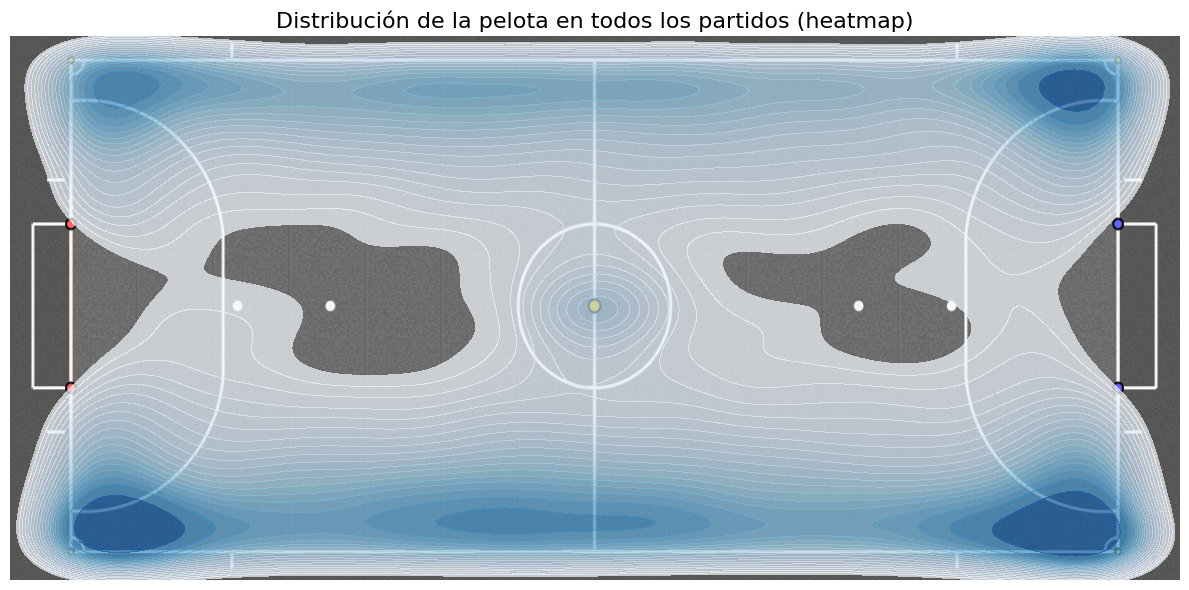

In [45]:
# Filtrar solo las posiciones de la pelota
ball_data = data_posiciones_filtered[data_posiciones_filtered['player_id'] == 0]

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')

# Crear el mapa de calor para las posiciones de la pelota
sns.kdeplot(
    x=ball_data['x'], y=ball_data['y'], 
    fill=True, cmap='Blues', bw_adjust=0.75, levels=20, thresh=0.1, alpha=0.7
)

# Configurar límites y ocultar ejes
plt.xlim([-605, 605])
plt.ylim([-255, 255])
plt.axis('off')  # Ocultar ejes

# Título
plt.title('Distribución de la pelota en todos los partidos (heatmap)', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

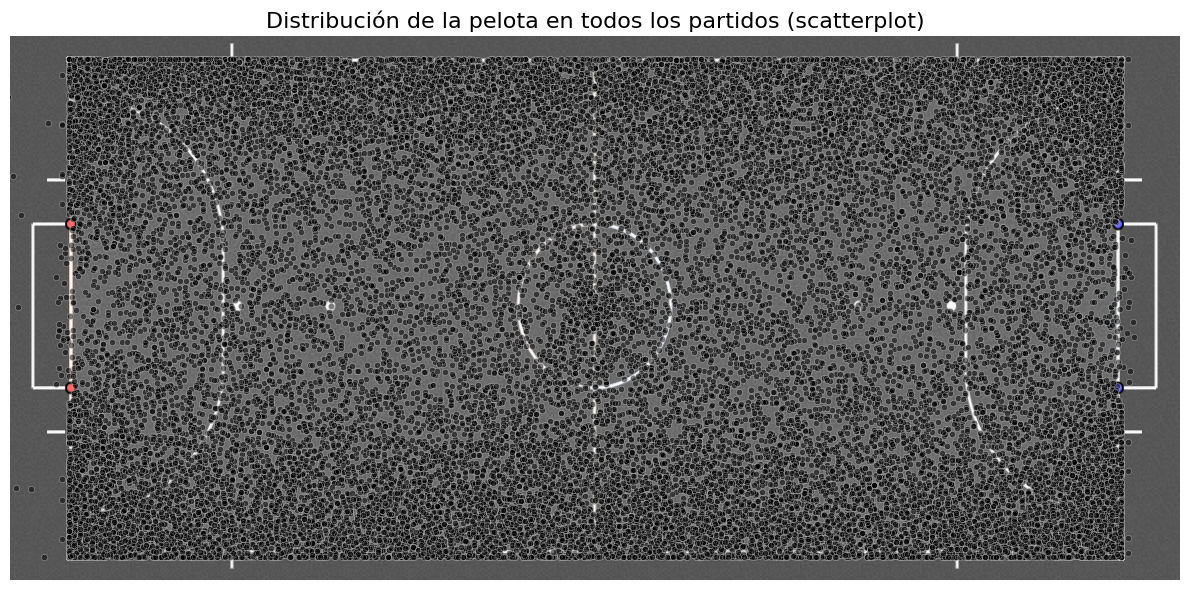

In [46]:
plt.figure(figsize=(12, 6))
plt.imshow(background_image, extent=[-605, 605, -255, 255], aspect='auto')

sns.scatterplot(
    x=ball_data['x'], y=ball_data['y'],
    color='Black', edgecolor='White', s=20, alpha=0.5
)

plt.xlim([-605, 605])
plt.ylim([-255, 255])
plt.axis('off')  # Ocultar ejes

plt.title('Distribución de la pelota en todos los partidos (scatterplot)', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Posicionamiento de la pelota antes de un gol en menos de n ticks, para cada equipo

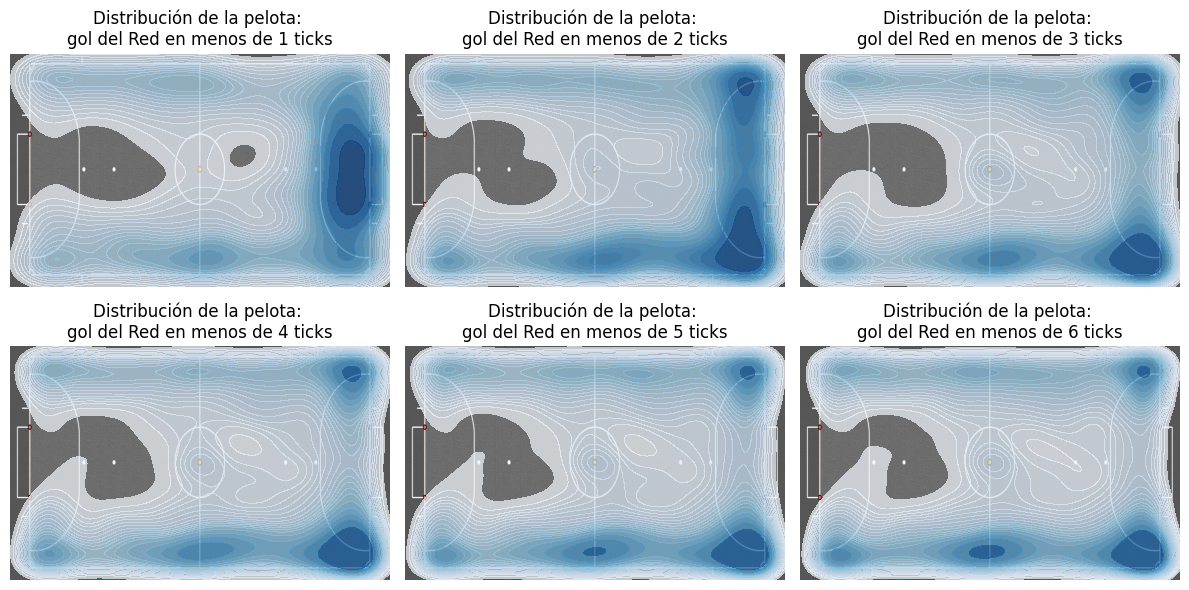

In [47]:
cf.plot_ball_heatmaps_for_team_goal(equipo='Red', title_prefix='Distribución de la pelota: ', data_pos=data_posiciones_filtered, data_grouped=data_grouped_entities_7ents)

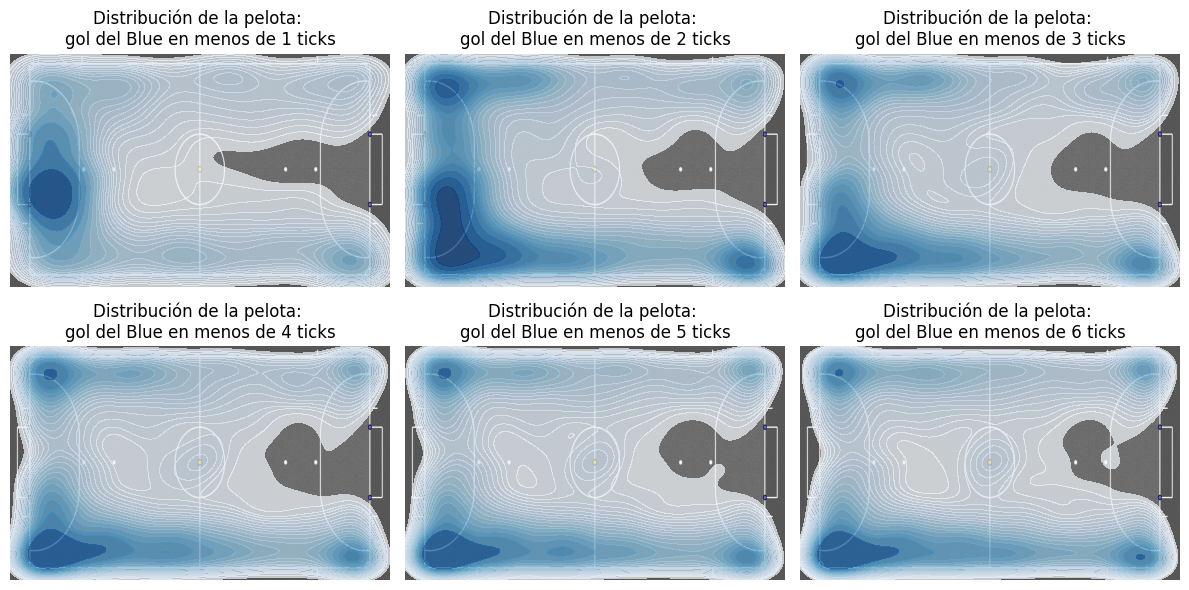

In [48]:
cf.plot_ball_heatmaps_for_team_goal(equipo='Blue', title_prefix='Distribución de la pelota: ', data_pos=data_posiciones_filtered, data_grouped=data_grouped_entities_7ents)